In [1]:
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d fareselmenshawii/face-detection-dataset

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/fareselmenshawii/face-detection-dataset
License(s): CC0-1.0
100% 4.42G/4.43G [00:55<00:00, 113MB/s] 
100% 4.43G/4.43G [00:55<00:00, 85.7MB/s]


In [2]:
import zipfile
with zipfile.ZipFile('/content/face-detection-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/face_data')

# Проверка содержимого
print("📂 Содержимое датасета:")
!ls -la /content/face_data

📂 Содержимое датасета:
total 664
drwxr-xr-x 5 root root   4096 Oct 30 08:41 .
drwxr-xr-x 1 root root   4096 Oct 30 08:40 ..
drwxr-xr-x 4 root root   4096 Oct 30 08:40 images
drwxr-xr-x 4 root root   4096 Oct 30 08:41 labels
drwxr-xr-x 2 root root 663552 Oct 30 08:41 labels2


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.3 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [7]:
data_yaml = """
train: /content/face_data/images/train
val: /content/face_data/images/val

nc: 1
names: ['face']
"""

with open("/content/face_data/data.yaml", "w") as f:
    f.write(data_yaml)

print("✅ Файл data.yaml создан!")


✅ Файл data.yaml создан!


In [11]:
from ultralytics import YOLO

model = YOLO('runs/detect/train/weights/last.pt')
results = model.train(
    data='/content/face_data/data.yaml',
    pretrained=True,
    workers=8,
    epochs=20,
    imgsz=640,
    batch=32,
    device='cuda',  # или 'cpu'
    patience=5,
    save=True,
    plots=True,
    lr0=0.01,
    cos_lr=True,
    weight_decay=1e-05,
    optimizer='AdamW',
    amp=True,
    cache=True,
    close_mosaic=5
)

Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=5, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/face_data/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs/detect/train/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=5, perspective=0.0, p

KeyboardInterrupt: 

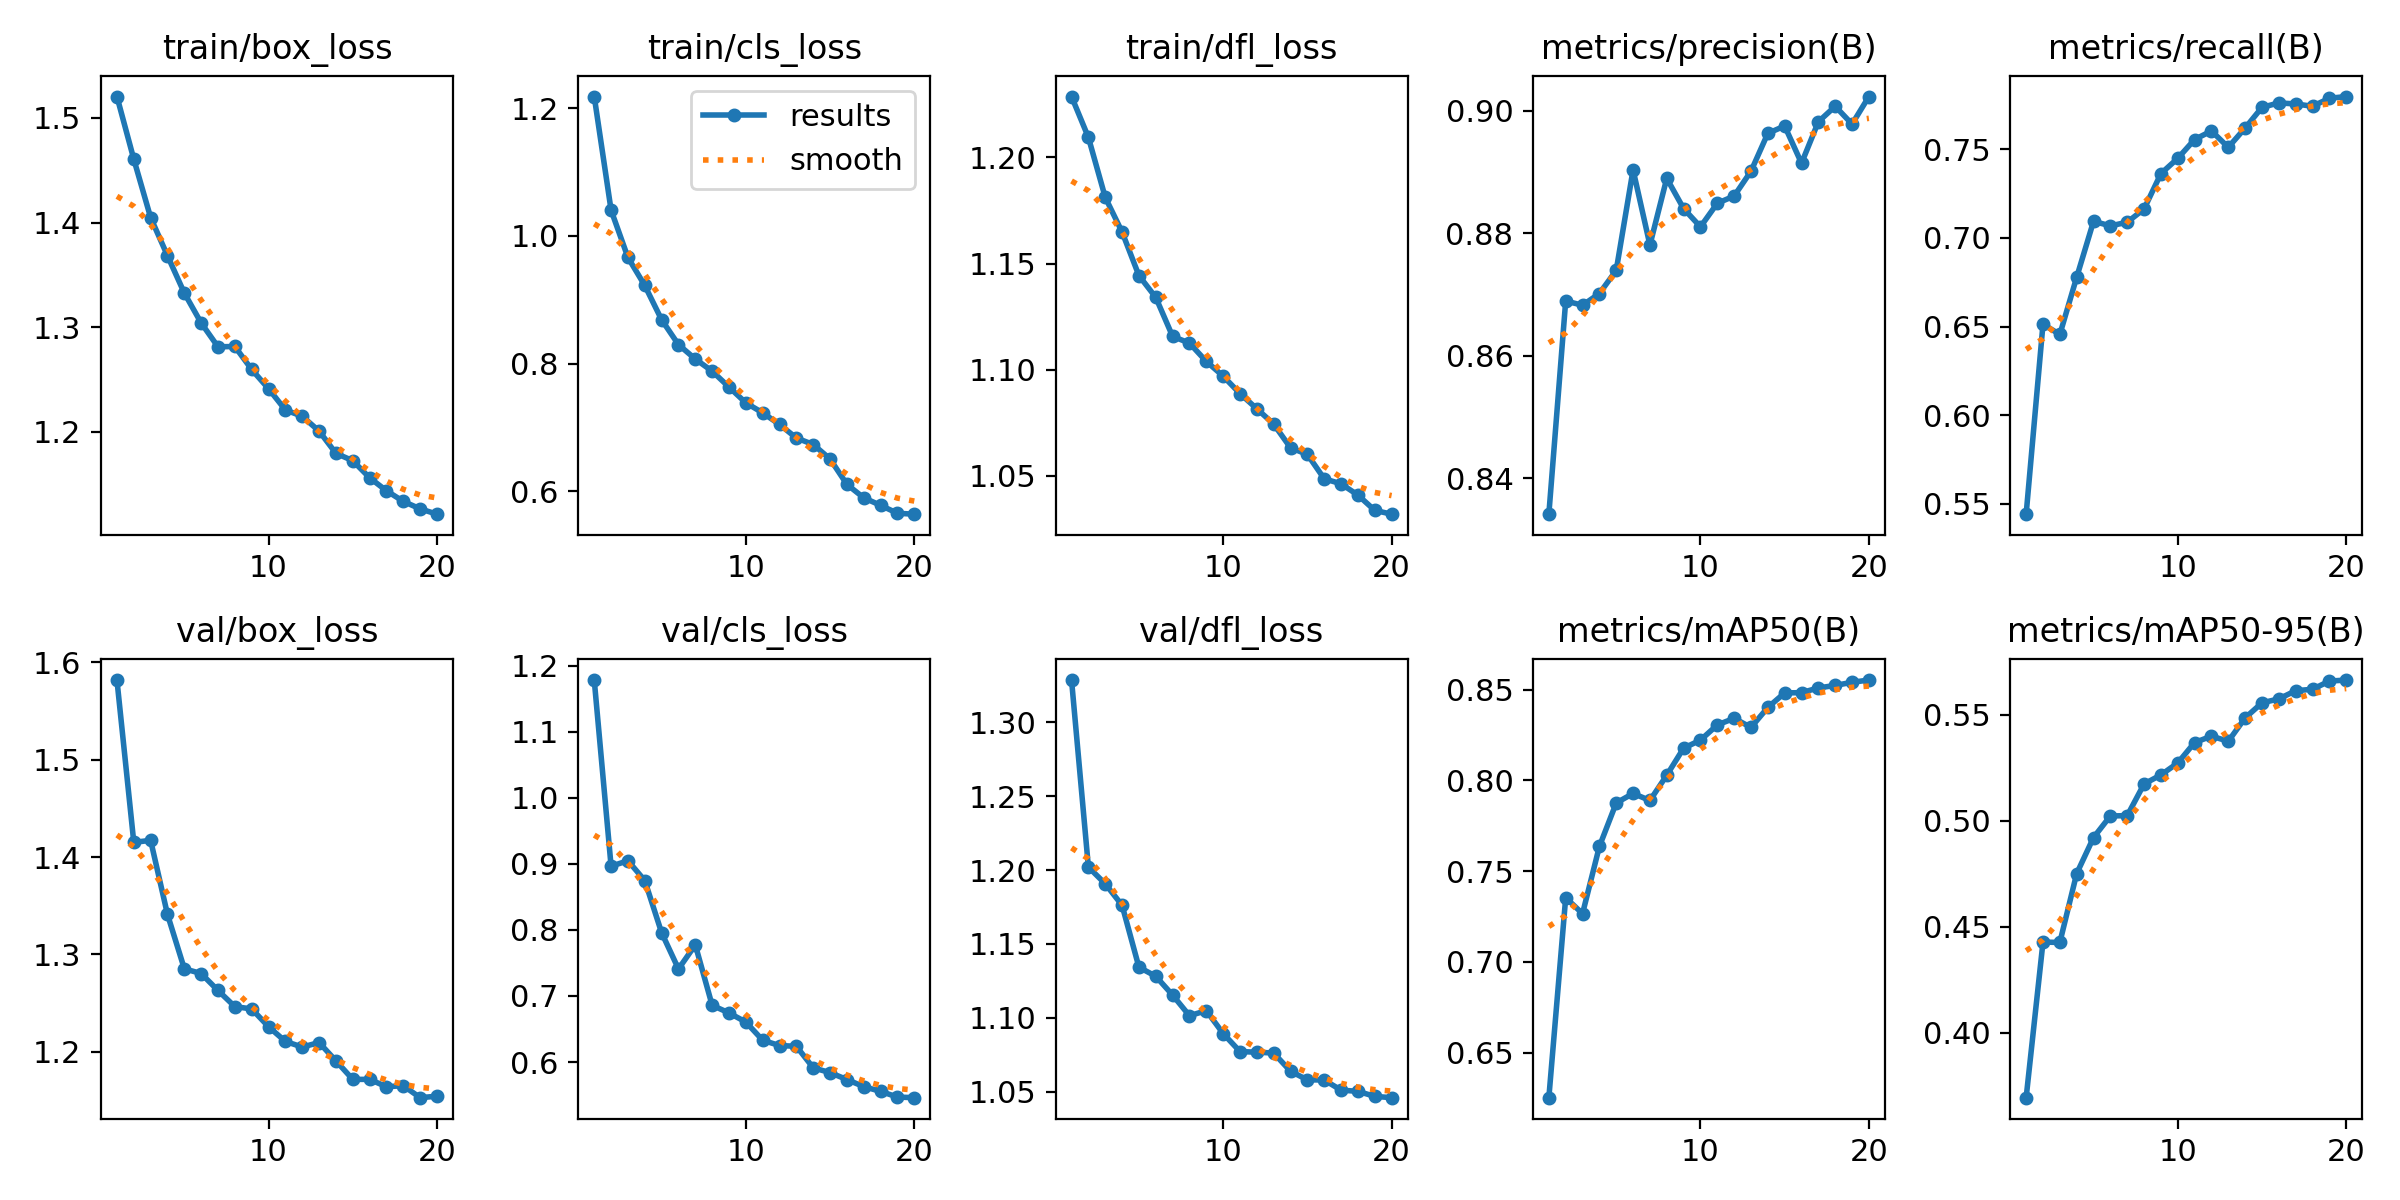

In [9]:
from IPython.display import Image, display

# заменяй "train" на "train2" или "train3", если нужно
display(Image(filename='/content/runs/detect/train/results.png'))

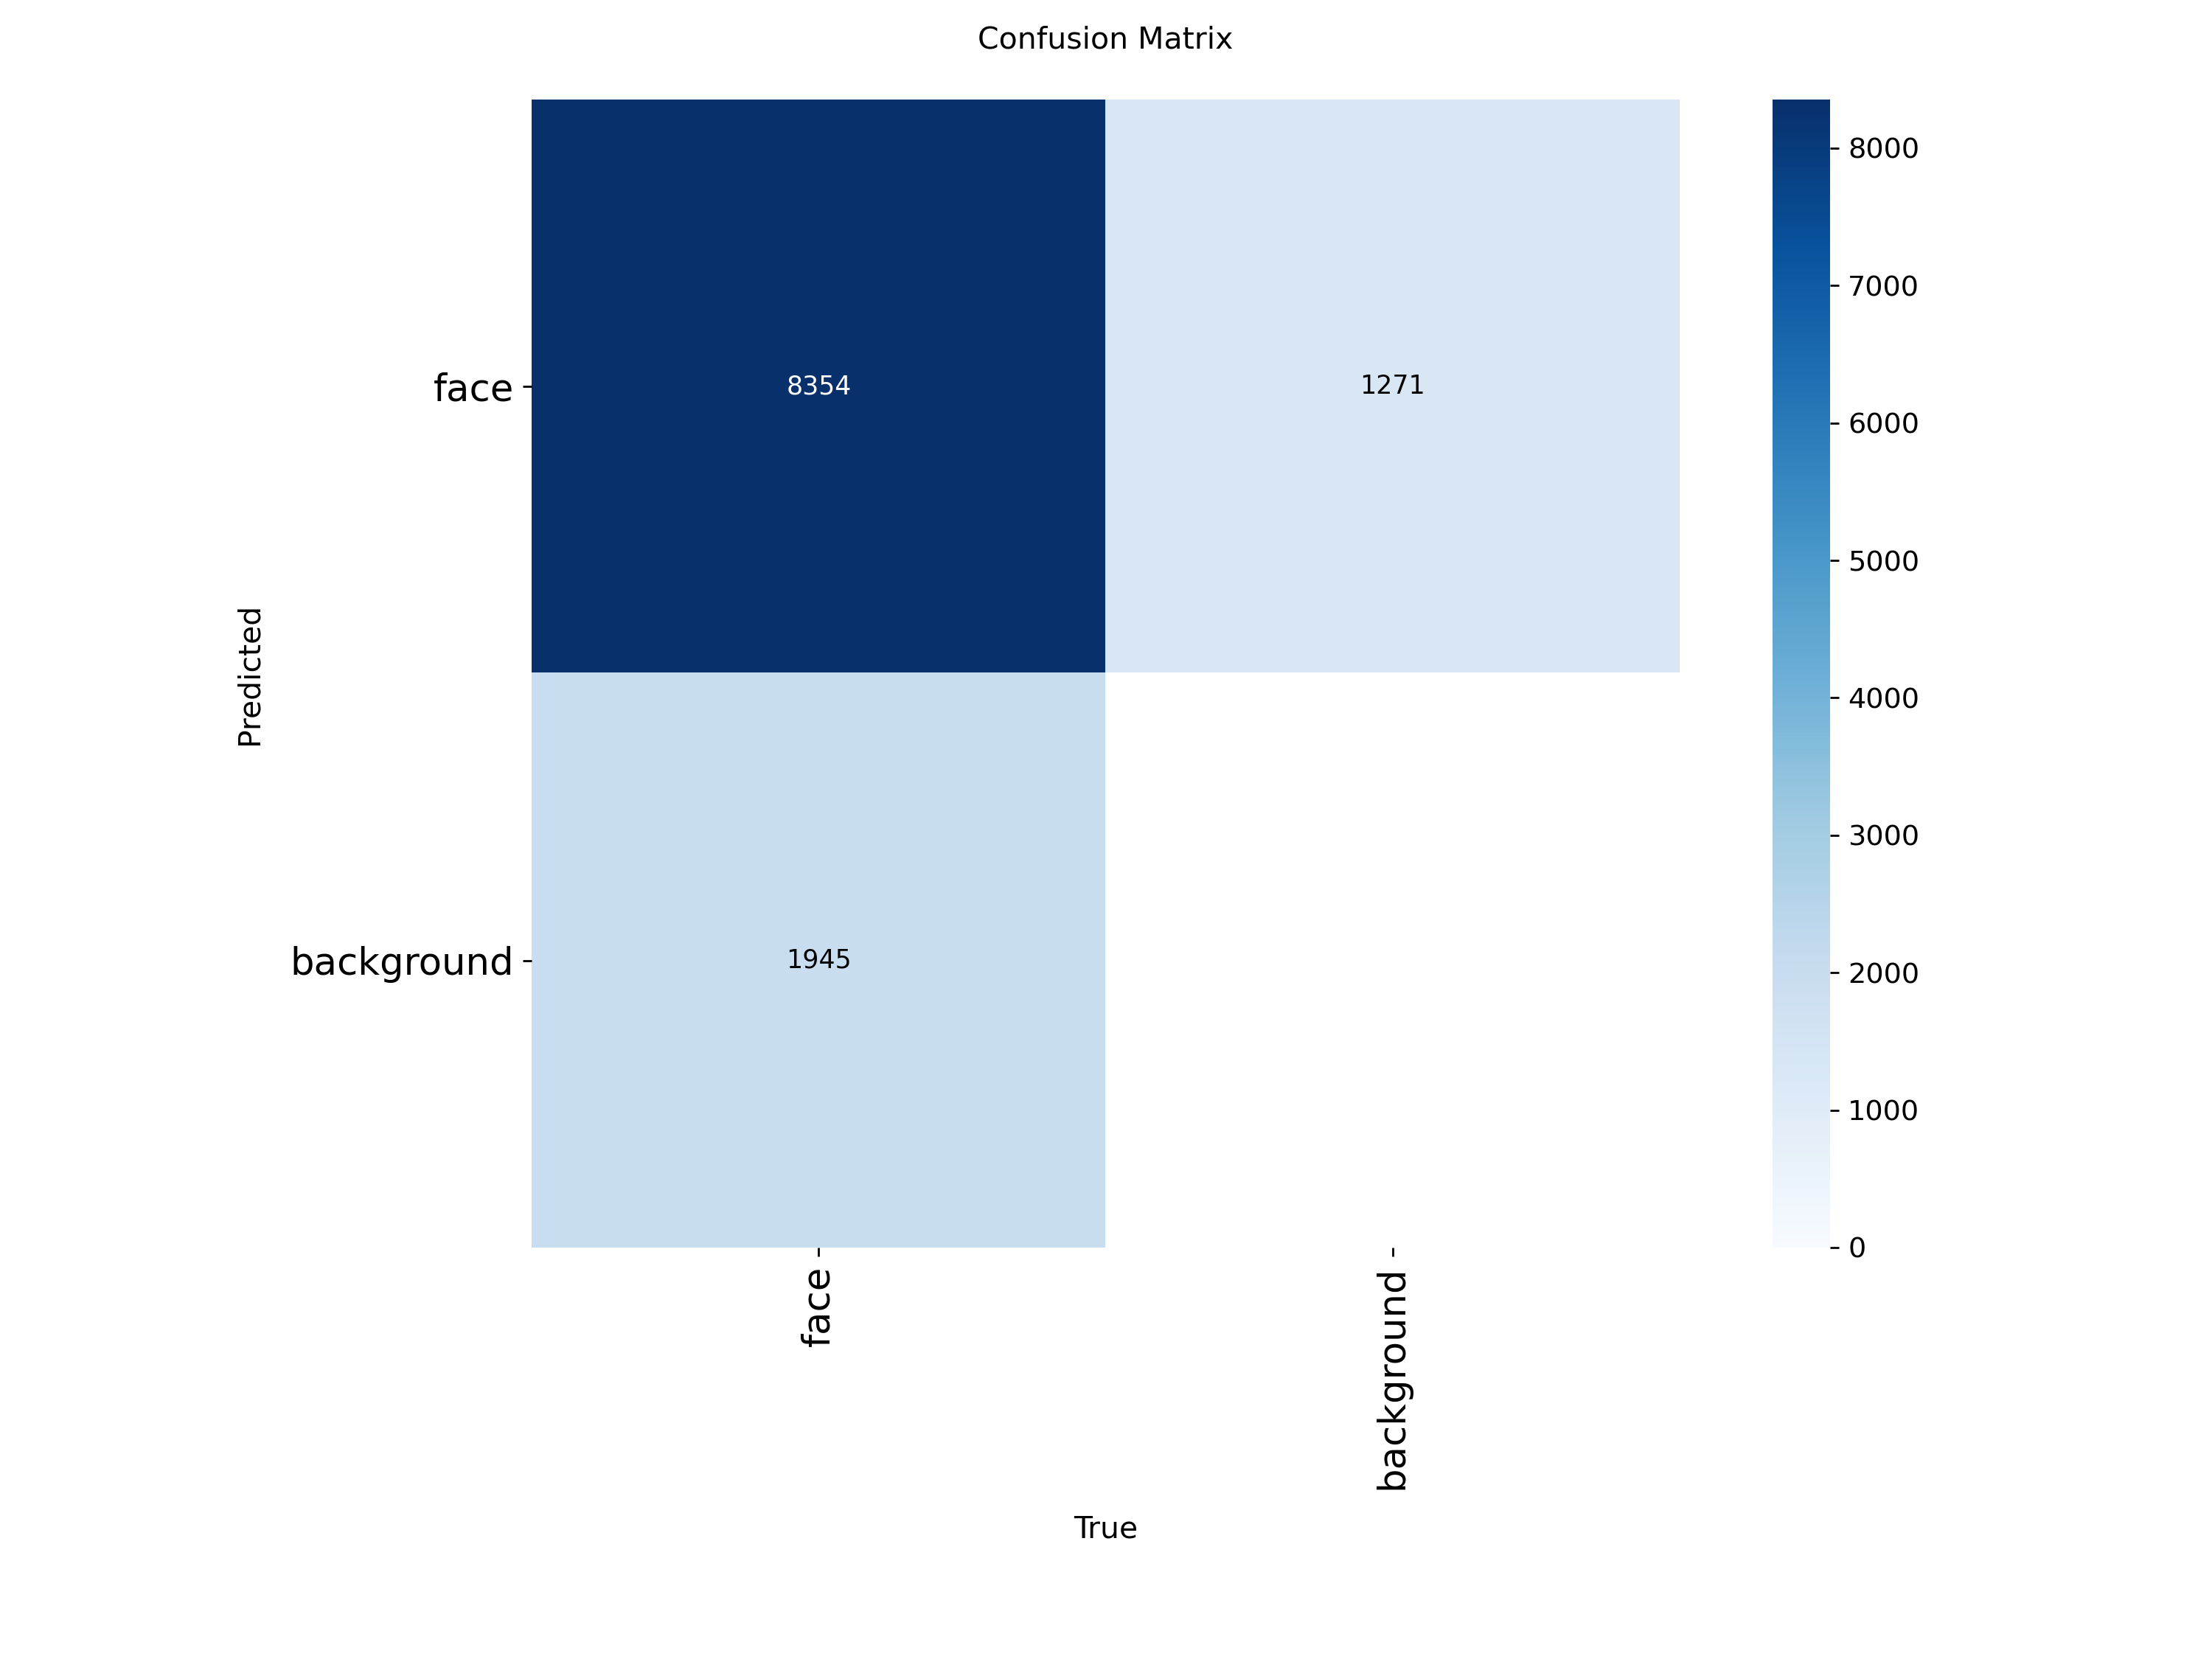

In [10]:
display(Image(filename='/content/runs/detect/train/confusion_matrix.png'))

In [6]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/last.pt')

results = model.train(
    data='/content/face_data/data.yaml',
    pretrained=False,
    resume=False,
    workers=8,
    epochs=20,
    imgsz=512,
    batch=32,
    device='cuda',  # или 'cpu'
    patience=5,
    save=True,
    plots=True,
    lr0=0.01,
    cos_lr=True,
    weight_decay=1e-05,
    optimizer='AdamW',
    amp=True,
    cache=True,
    close_mosaic=5
)

Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=5, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/face_data/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/detect/train/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=5, perspecti

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/
!cp /content/runs/detect/train/weights/last.pt /content/drive/MyDrive/

In [5]:
!ls /content/drive/MyDrive/

 best.pt  'Colab Notebooks'   last.pt


In [7]:
!cp /content/runs/detect/train /content/drive/MyDrive/

cp: -r not specified; omitting directory '/content/runs/detect/train'


In [8]:
!zip -r /content/runs.zip /content/runs


  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train3/ (stored 0%)
  adding: content/runs/detect/train3/weights/ (stored 0%)
  adding: content/runs/detect/train3/labels.jpg (deflated 34%)
  adding: content/runs/detect/train3/args.yaml (deflated 52%)
  adding: content/runs/detect/train2/ (stored 0%)
  adding: content/runs/detect/train2/weights/ (stored 0%)
  adding: content/runs/detect/train2/weights/best.pt (deflated 36%)
  adding: content/runs/detect/train2/weights/last.pt (deflated 37%)
  adding: content/runs/detect/train2/labels.jpg (deflated 34%)
  adding: content/runs/detect/train2/results.csv (deflated 54%)
  adding: content/runs/detect/train2/args.yaml (deflated 52%)
  adding: content/runs/detect/train2/train_batch1.jpg (deflated 3%)
  adding: content/runs/detect/train2/train_batch0.jpg (deflated 3%)
  adding: content/runs/detect/train2/train_batch2.jpg (deflated 4%)
  adding: content/runs/detect/train5/ (stored 0%)
 

In [9]:
from google.colab import files
files.download('/content/runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


0: 384x512 1 face, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 512)


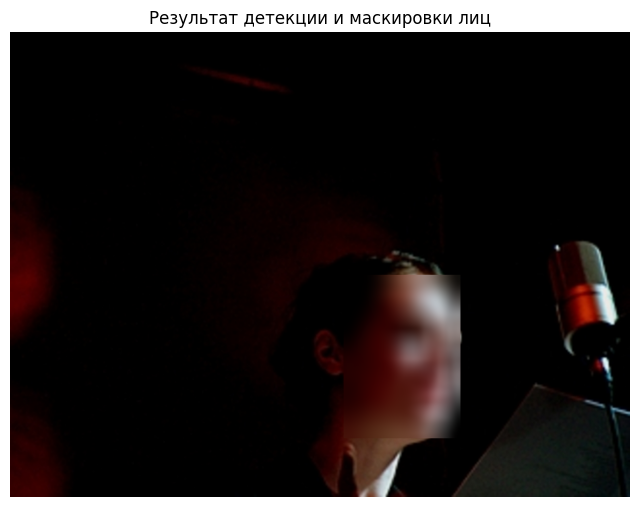

In [14]:
import cv2

import matplotlib.pyplot as plt

model = YOLO('runs/detect/train/weights/best.pt')

img = cv2.imread('/content/face_data/images/train/0019f8ef73bbe608.jpg')
results = model(img)

for r in results:
    for box in r.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        face_region = img[y1:y2, x1:x2]
        # Маскирование — например, размыть
        face_region = cv2.GaussianBlur(face_region, (51, 51), 30)
        img[y1:y2, x1:x2] = face_region

cv2.imwrite('masked_face.jpg', img)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Отображаем прямо в ноутбуке
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Результат детекции и маскировки лиц')
plt.show()


0: 384x512 1 face, 10.1ms
Speed: 2.4ms preprocess, 10.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 512)


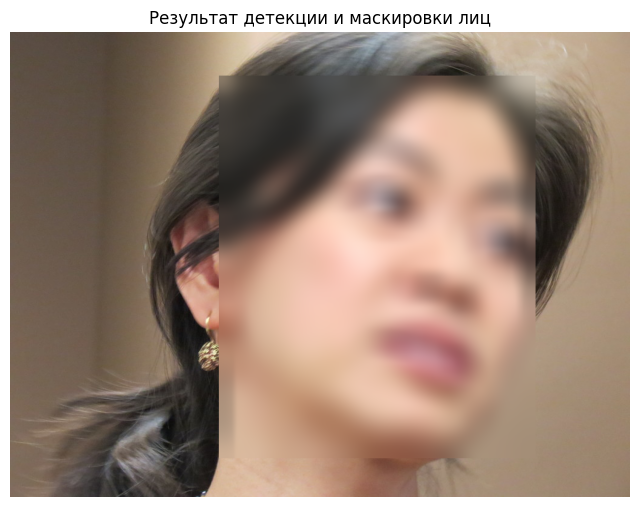

In [15]:
img = cv2.imread('/content/face_data/images/train/0076dce7e8685a71.jpg')
results = model(img)

for r in results:
    for box in r.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        face_region = img[y1:y2, x1:x2]
        # Маскирование — например, размыть
        face_region = cv2.GaussianBlur(face_region, (51, 51), 30)
        img[y1:y2, x1:x2] = face_region

cv2.imwrite('masked_face.jpg', img)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Отображаем прямо в ноутбуке
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Результат детекции и маскировки лиц')
plt.show()